In [1]:
IMG_WIDTH = 1400
IMG_HEIGHT = 1400
ROW_SLICE = slice(0, 1400)
COL_SLICE = slice(1000, None)

In [2]:
import os
import sys
import numpy as np
sys.path.append("../")
from matplotlib.image import imread
import matplotlib.pyplot as plt
import tensorflow as tf
from UNet import get_unet

Using TensorFlow backend.


In [3]:
data_dir = "/storage/yw18581/data/"
data_folder = os.path.join(data_dir, 'train_validation_test')
clean_dir = os.path.join(data_folder, 'clean_300')

In [4]:
def inference_step(network_model, test_data_generator, predict_steps):

    y_pred = list()

    for _ in tqdm(range(predict_steps)):
        X_batch, _ = next(test_data_generator)
        Y_batch_pred = network_model.predict_on_batch(X_batch)
        #print(Y_batch_pred.shape)
        y_pred.append(Y_batch_pred)
    y_pred = np.concatenate(y_pred, axis=0)

    return y_pred

In [5]:
CHECKPOINT_FOLDER_PATH = os.path.join(data_dir, 'trained_models')
TASK_NAME = 'UNet_retrain_new_data_clean_300'
TASK_FOLDER_PATH = os.path.join(CHECKPOINT_FOLDER_PATH, TASK_NAME)

In [6]:
TRAINING_WEIGHTS_FILEPATH=os.path.join(TASK_FOLDER_PATH, 'retrained_UNet_2000_epochs_clean_300.hdf5')

In [7]:
TRAINING_WEIGHTS_FILEPATH=os.path.join(TASK_FOLDER_PATH, 'retrained_UNet_1500_epochs_clean_300.hdf5')

In [7]:
model1500 = get_unet()
model1500.load_weights(TRAINING_WEIGHTS_FILEPATH)

In [8]:
def import_test_data(d):
    indices = np.load(os.path.join(TASK_FOLDER_PATH, "train_val_test_indices_{}mm.npz".format(d)))
    Xy = np.load(os.path.join(clean_dir, "Xy_{}mm_clean_300.npz".format(d)))
    test_indices = indices["test"]
    X = Xy["x"]
    y = Xy["y"]
    return X[test_indices],y[test_indices]

In [9]:
X_10mm_test, y_10mm_test = import_test_data(10)

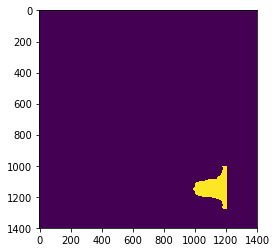

In [11]:
plt.imshow(y_10mm_test[0][...,0])

In [12]:
preds_10 = model1500.predict(X_10mm_test, batch_size=2)

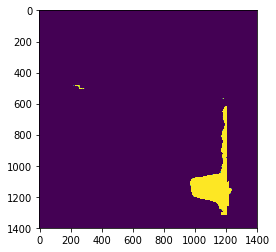

In [15]:
plt.imshow(preds_10[10][...,0])

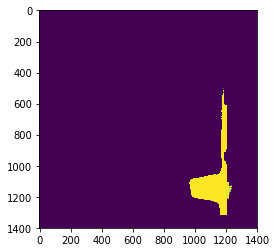

In [13]:
plt.imshow(preds_10[10][...,0])

In [16]:
import pickle

In [17]:
pickle.dump?

Signature: pickle.dump(obj, file, protocol=None, *, fix_imports=True)
Docstring:
Write a pickled representation of obj to the open file object file.

This is equivalent to ``Pickler(file, protocol).dump(obj)``, but may
be more efficient.

The optional *protocol* argument tells the pickler to use the given
protocol supported protocols are 0, 1, 2, 3 and 4.  The default
protocol is 3; a backward-incompatible protocol designed for Python 3.

Specifying a negative protocol version selects the highest protocol
version supported.  The higher the protocol used, the more recent the
version of Python needed to read the pickle produced.

The *file* argument must have a write() method that accepts a single
bytes argument.  It can thus be a file object opened for binary
writing, an io.BytesIO instance, or any other custom object that meets
this interface.

If *fix_imports* is True and protocol is less than 3, pickle will try
to map the new Python 3 names to the old module names used in Python
2, s

In [ ]:
picklei